<a href="https://colab.research.google.com/github/eoinleen/PDB-tools/blob/main/pdb_analyser_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Please upload your PDB file:


Saving PDB_plus_scar_B_sorted_fixed_v4_1-coot-1.pdb to PDB_plus_scar_B_sorted_fixed_v4_1-coot-1 (6).pdb
📄 Analyzing PDB file: PDB_plus_scar_B_sorted_fixed_v4_1-coot-1 (6).pdb
📏 Total lines in file: 3476
✅ Total ATOM/HETATM records: 3474
✅ Record types: {'ATOM': np.int64(3474)}
✅ Total chains: 2
✅ Chain IDs: ['A', 'B']
✅ Total residues: 469
✅ TER records at lines: [2026]
✅ END records at lines: [3476]
✅ Atom numbers sequential: No

❌ Found 2 breaks in atom numbering:
      atom_number  atom_diff  line_number chain_id  residue_number atom_name
0               1        NaN            1        A               1         N
2025         2027        2.0         2027        B               1         N

📊 Coordinate ranges:
  X: -5.208 to 69.207
  Y: -32.640 to 36.114
  Z: -111.201 to -10.546
📊 B-factor range: 21.44 to 144.38

CHAIN ANALYSIS

--- Chain A ---
Atoms: 2025, Residues: 254
Residue range: 1 to 254
✅ Residue numbers sequential
Top residues: {'LEU': np.int64(192), 'GLU': np.int64(181), 

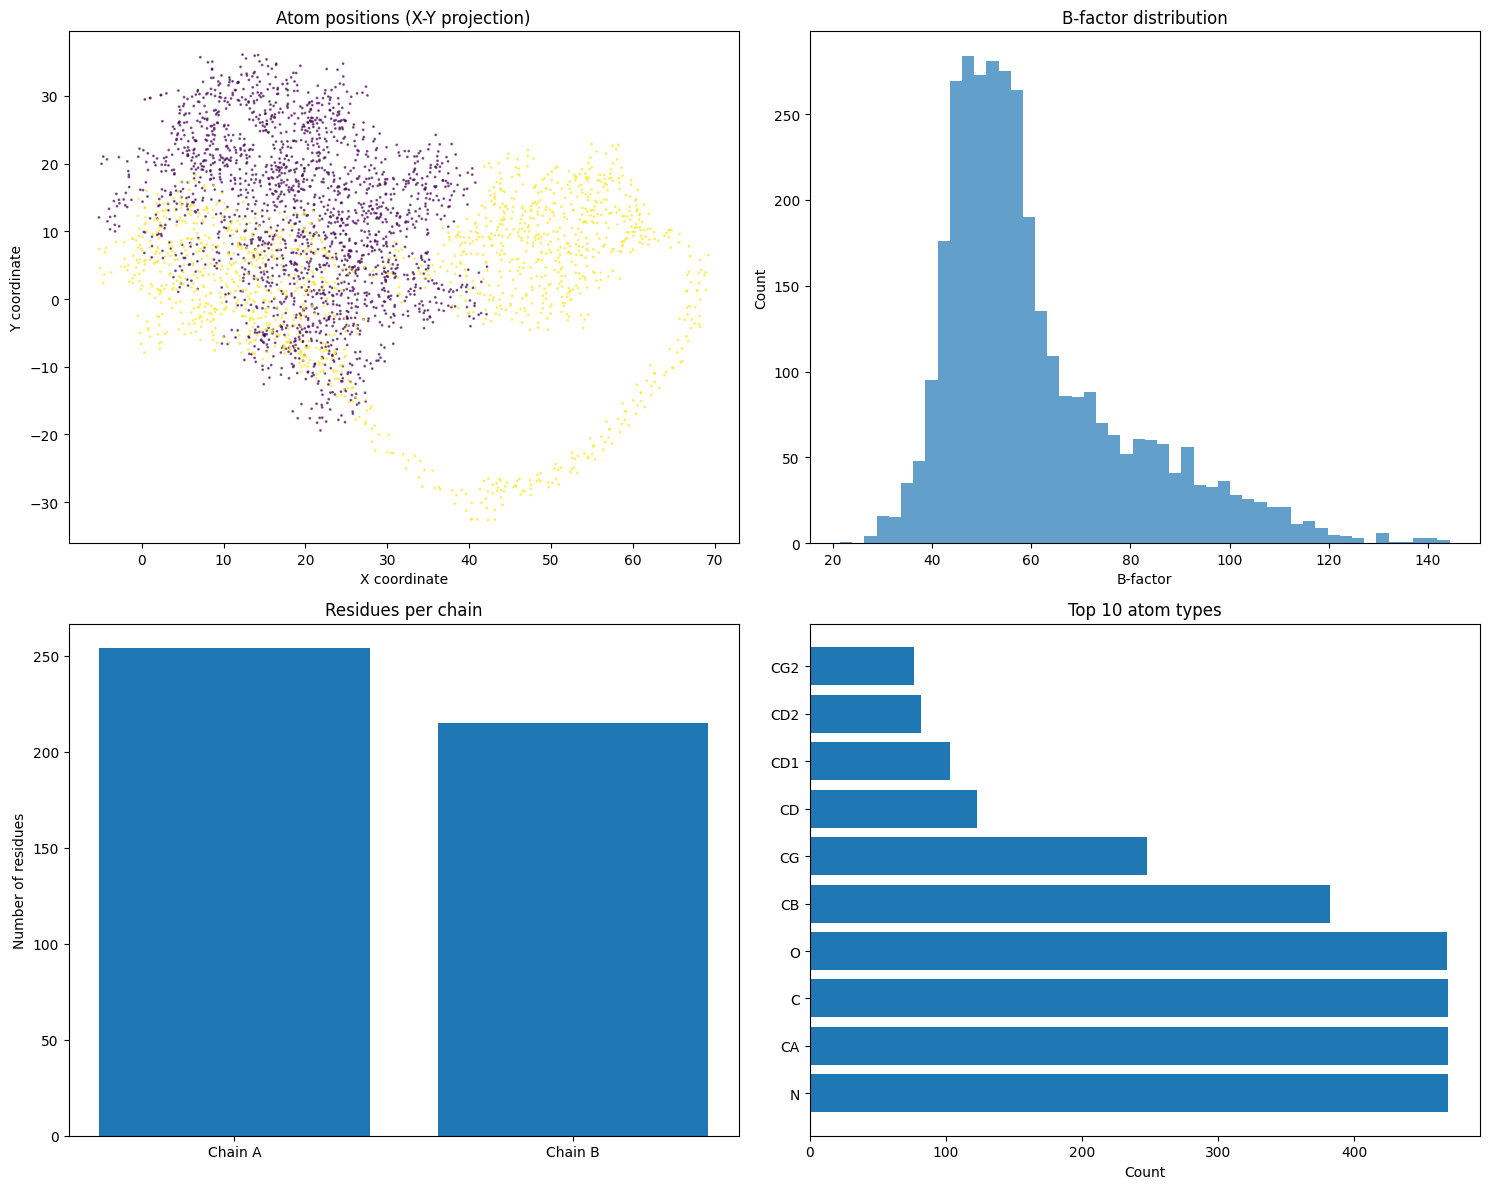


⚠️ Atom numbers are not sequential.
To renumber the atoms, run the following in a new cell:
```python
renumber_atoms(df)
```

SEQUENCE EXTRACTION

🧬 Chain A:
   Length: 254 residues
   Range: 1-254
   Sequence: DPFQLIPCNFFSEEKQEPFQVKVASEALLIMDLHAHVSMAAVIGLLGGRYSEVDKVVEVCAAEPCNSLSTGLQCEMDPVSQTQASETLAVRGFSVIGWYHSHPAFDPNPSLRDIDTQAKYQSYFSRGGAKFIGMIVSPYNRNNPLPYSQITCLVISEEISPDGSYRLPYKFEVQQMLEEPQWGLVFEKTRWIIEKYRLSHSSVPMDKIFRRDSDLTCLQKLLECMRKTLSKVTNCFMAEEFLTEIENLFLSNYK

🧬 Chain B:
   Length: 215 residues
   Range: 1-215
   Sequence: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG

💾 FASTA file written to: PDB_plus_scar_B_sorted_fixed_v4_1-coot-1 (6)_sequences.fasta

📊 Summary:
   Total protein chains: 2
   Total residues: 469
   Chain lengths: 215-254 residues

✅ Analysis complete!


In [9]:
"""
=============================================================================
                     COMPREHENSIVE PDB STRUCTURE ANALYZER
=============================================================================

DESCRIPTION:
This script provides comprehensive analysis and validation of Protein Data Bank
(PDB) files with enhanced parsing, structural validation, sequence extraction,
and data visualization capabilities.

MAIN FEATURES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 STRUCTURAL ANALYSIS:
   • Parses ATOM and HETATM records with comprehensive field extraction
   • Validates atom numbering continuity and identifies gaps
   • Analyzes residue numbering per chain and detects missing residues
   • Extracts coordinate ranges (X, Y, Z) and B-factor distributions
   • Identifies alternative conformations and insertion codes
   • Locates structural markers (TER, END records)

🔍 DATA VALIDATION:
   • Comprehensive error checking for malformed PDB lines
   • Chain-by-chain statistical analysis
   • Residue composition analysis per chain
   • Coordinate boundary validation
   • Occupancy and temperature factor analysis

📈 VISUALIZATION:
   • 3D structure projection (X-Y coordinates with chain coloring)
   • B-factor distribution histograms
   • Residue count comparison across chains
   • Top 10 most frequent atom types
   • Chain length and composition charts

🧬 SEQUENCE EXTRACTION:
   • Automatic protein sequence extraction per chain
   • Three-letter to single-letter amino acid conversion
   • Handles modified residues (MSE, SEC, PYL)
   • FASTA format export with detailed headers
   • Non-standard residue detection and reporting
   • Sequence length and range statistics

🛠️ FILE PROCESSING:
   • Atom renumbering functionality for non-sequential structures
   • Enhanced PDB line formatting with all standard fields
   • Automatic file upload in Google Colab environment
   • Output generation for corrected PDB files

⚡ IMMEDIATE EXECUTION:
   • No function calls required - runs automatically upon execution
   • Real-time analysis and reporting
   • Interactive file upload interface
   • Comprehensive console output with progress indicators

USAGE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Simply run this script in a Jupyter/Colab environment. It will:
1. Prompt for PDB file upload
2. Perform comprehensive structural analysis
3. Generate validation reports and statistics
4. Create visualization plots
5. Extract and export protein sequences in FASTA format
6. Offer atom renumbering if structural issues are detected

OUTPUT FILES:
   • [filename]_sequences.fasta - Protein sequences for all chains
   • renumbered.pdb - Corrected PDB file (if renumbering is performed)

REQUIREMENTS:
   • pandas, matplotlib, numpy (data processing and visualization)
   • Google Colab environment (for file upload functionality)
   • Standard Python libraries: collections, warnings

AUTHOR: Enhanced PDB Analysis Script
VERSION: 6.0 - Comprehensive Analysis Edition
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import warnings

# Upload the PDB file
from google.colab import files
print("📤 Please upload your PDB file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

print(f"📄 Analyzing PDB file: {filename}")

# Read all lines from the file
with open(filename, 'r') as f:
    lines = f.readlines()

print(f"📏 Total lines in file: {len(lines)}")
print("=" * 60)

# Enhanced parsing function with more PDB fields
def parse_pdb_atoms(lines):
    atoms = []
    for i, line in enumerate(lines):
        if line.startswith(('ATOM', 'HETATM')) and len(line) >= 54:
            try:
                atom = {
                    'record_type': line[0:6].strip(),
                    'atom_number': int(line[6:11]),
                    'atom_name': line[12:16].strip(),
                    'alt_loc': line[16].strip(),
                    'residue_name': line[17:20].strip(),
                    'chain_id': line[21].strip(),
                    'residue_number': int(line[22:26]),
                    'insertion_code': line[26].strip(),
                    'x': float(line[30:38]),
                    'y': float(line[38:46]),
                    'z': float(line[46:54]),
                    'occupancy': float(line[54:60]) if len(line) > 54 and line[54:60].strip() else 1.0,
                    'temp_factor': float(line[60:66]) if len(line) > 60 and line[60:66].strip() else 0.0,
                    'element': line[76:78].strip() if len(line) > 76 else '',
                    'line_number': i + 1
                }
                atoms.append(atom)
            except (ValueError, IndexError) as e:
                continue
    return pd.DataFrame(atoms)

# Parse atom records
df = parse_pdb_atoms(lines)

if df.empty:
    print("❌ No valid ATOM/HETATM records found!")
else:
    # Basic statistics
    print(f"✅ Total ATOM/HETATM records: {len(df)}")
    print(f"✅ Record types: {dict(df['record_type'].value_counts())}")
    print(f"✅ Total chains: {df['chain_id'].nunique()}")
    print(f"✅ Chain IDs: {sorted(df['chain_id'].unique())}")
    print(f"✅ Total residues: {df.groupby(['chain_id', 'residue_number']).ngroups}")

    # Locate TER and END records
    ter_lines = [i + 1 for i, line in enumerate(lines) if line.startswith('TER')]
    end_lines = [i + 1 for i, line in enumerate(lines) if line.startswith('END')]

    print(f"✅ TER records at lines: {ter_lines if ter_lines else 'None'}")
    print(f"✅ END records at lines: {end_lines if end_lines else 'None'}")

    # Atom number continuity check
    df['atom_diff'] = df['atom_number'].diff()
    non_seq_atoms = df[df['atom_diff'] != 1].copy()
    print(f"✅ Atom numbers sequential: {'Yes' if non_seq_atoms.empty else 'No'}")

    # Show atom number discontinuities if any
    if not non_seq_atoms.empty:
        print(f"\n❌ Found {len(non_seq_atoms)} breaks in atom numbering:")
        print(non_seq_atoms[['atom_number', 'atom_diff', 'line_number', 'chain_id',
                            'residue_number', 'atom_name']].head(10))

    # Check for alternative locations
    alt_locs = df[df['alt_loc'] != '']
    if not alt_locs.empty:
        print(f"\n⚠️  Found {len(alt_locs)} atoms with alternative locations")
        print(f"Alt location indicators: {sorted(alt_locs['alt_loc'].unique())}")

    # Coordinate ranges
    print(f"\n📊 Coordinate ranges:")
    print(f"  X: {df['x'].min():.3f} to {df['x'].max():.3f}")
    print(f"  Y: {df['y'].min():.3f} to {df['y'].max():.3f}")
    print(f"  Z: {df['z'].min():.3f} to {df['z'].max():.3f}")

    if df['temp_factor'].std() > 0:
        print(f"📊 B-factor range: {df['temp_factor'].min():.2f} to {df['temp_factor'].max():.2f}")

    # Residue number check per chain
    print("\n" + "="*60)
    print("CHAIN ANALYSIS")
    print("="*60)

    for chain_id, group in df.groupby('chain_id'):
        chain_name = chain_id if chain_id else '(blank)'
        print(f"\n--- Chain {chain_name} ---")

        residues = group['residue_number'].drop_duplicates().sort_values().reset_index(drop=True)

        # Find gaps in residue numbering
        gaps = []
        for i in range(1, len(residues)):
            if residues.iloc[i] - residues.iloc[i-1] > 1:
                gaps.append((residues.iloc[i-1], residues.iloc[i]))

        atom_count = len(group)
        residue_count = len(residues)

        print(f"Atoms: {atom_count}, Residues: {residue_count}")
        print(f"Residue range: {residues.min()} to {residues.max()}")

        if gaps:
            print(f"❌ Gaps in residue numbering: {gaps}")
        else:
            print("✅ Residue numbers sequential")

        # Most common residues
        common_residues = group['residue_name'].value_counts().head(3)
        print(f"Top residues: {dict(common_residues)}")

    # Create visualizations
    print("\n📈 Creating visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 3D scatter plot of atoms (projected to 2D)
    colors = df['chain_id'].astype('category').cat.codes
    axes[0,0].scatter(df['x'], df['y'], c=colors, alpha=0.6, s=1)
    axes[0,0].set_xlabel('X coordinate')
    axes[0,0].set_ylabel('Y coordinate')
    axes[0,0].set_title('Atom positions (X-Y projection)')

    # B-factor distribution
    if df['temp_factor'].std() > 0:
        axes[0,1].hist(df['temp_factor'], bins=50, alpha=0.7)
        axes[0,1].set_xlabel('B-factor')
        axes[0,1].set_ylabel('Count')
        axes[0,1].set_title('B-factor distribution')
    else:
        axes[0,1].text(0.5, 0.5, 'No B-factor variation', ha='center', va='center',
                      transform=axes[0,1].transAxes)
        axes[0,1].set_title('B-factor distribution')

    # Residue counts per chain
    chain_counts = df.groupby('chain_id')['residue_number'].nunique()
    axes[1,0].bar(range(len(chain_counts)), chain_counts.values)
    axes[1,0].set_xticks(range(len(chain_counts)))
    axes[1,0].set_xticklabels([f"Chain {c}" if c else "Chain (blank)"
                              for c in chain_counts.index])
    axes[1,0].set_ylabel('Number of residues')
    axes[1,0].set_title('Residues per chain')

    # Atom type distribution
    atom_types = df['atom_name'].value_counts().head(10)
    axes[1,1].barh(range(len(atom_types)), atom_types.values)
    axes[1,1].set_yticks(range(len(atom_types)))
    axes[1,1].set_yticklabels(atom_types.index)
    axes[1,1].set_xlabel('Count')
    axes[1,1].set_title('Top 10 atom types')

    plt.tight_layout()
    plt.show()

    # Renumbering function
    def renumber_atoms(df, output_filename="renumbered.pdb"):
        df = df.copy()
        df['new_atom_number'] = range(1, len(df) + 1)

        def format_pdb_line(row):
            return (f"{row['record_type']:<6}"
                    f"{row['new_atom_number']:>5} "
                    f"{row['atom_name']:>4}"
                    f"{row['alt_loc']}"
                    f"{row['residue_name']:>3} "
                    f"{row['chain_id']}"
                    f"{row['residue_number']:>4}"
                    f"{row['insertion_code']}"
                    f"   "
                    f"{row['x']:8.3f}"
                    f"{row['y']:8.3f}"
                    f"{row['z']:8.3f}"
                    f"{row['occupancy']:6.2f}"
                    f"{row['temp_factor']:6.2f}"
                    f"          "
                    f"{row['element']:>2}")

        with open(output_filename, "w") as out:
            for _, row in df.iterrows():
                out.write(format_pdb_line(row) + "\n")
            out.write("END\n")

        print(f"\n🛠️ Renumbered PDB written to: {output_filename}")

    # User prompt for renumbering
    if not non_seq_atoms.empty:
        print("\n⚠️ Atom numbers are not sequential.")
        print("To renumber the atoms, run the following in a new cell:")
        print("```python\nrenumber_atoms(df)\n```")

    # Extract sequences and export to FASTA
    print("\n" + "="*60)
    print("SEQUENCE EXTRACTION")
    print("="*60)

    # Standard amino acid three-letter to one-letter code mapping
    aa_dict = {
        'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C',
        'GLU': 'E', 'GLN': 'Q', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
        'LEU': 'L', 'LYS': 'K', 'MET': 'M', 'PHE': 'F', 'PRO': 'P',
        'SER': 'S', 'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V',
        # Common modified residues
        'MSE': 'M',  # Selenomethionine
        'SEC': 'U',  # Selenocysteine
        'PYL': 'O',  # Pyrrolysine
    }

    def extract_sequences(df):
        """Extract protein sequences from PDB data."""
        sequences = {}

        for chain_id, chain_group in df.groupby('chain_id'):
            chain_name = chain_id if chain_id else 'blank'

            # Get unique residues in order
            residues = chain_group.groupby('residue_number').first().sort_index()

            # Filter for standard amino acids (exclude waters, ions, etc.)
            protein_residues = residues[residues['residue_name'].isin(aa_dict.keys())]

            if len(protein_residues) > 0:
                # Convert to single letter codes
                sequence = ''.join([aa_dict.get(res, 'X') for res in protein_residues['residue_name']])

                sequences[chain_name] = {
                    'sequence': sequence,
                    'length': len(sequence),
                    'residue_range': f"{protein_residues.index.min()}-{protein_residues.index.max()}",
                    'non_standard': len([res for res in protein_residues['residue_name'] if res not in aa_dict])
                }

                print(f"\n🧬 Chain {chain_name}:")
                print(f"   Length: {len(sequence)} residues")
                print(f"   Range: {protein_residues.index.min()}-{protein_residues.index.max()}")
                if sequences[chain_name]['non_standard'] > 0:
                    print(f"   Non-standard residues: {sequences[chain_name]['non_standard']} (marked as X)")
                print(f"   Sequence: {sequence}")

        return sequences

    def write_fasta(sequences, filename_base):
        """Write sequences to FASTA format."""
        fasta_filename = f"{filename_base}_sequences.fasta"

        with open(fasta_filename, 'w') as f:
            for chain_name, data in sequences.items():
                header = f">{filename_base}_chain_{chain_name}|length:{data['length']}|range:{data['residue_range']}"
                f.write(header + "\n")

                # Write sequence in 80-character lines (standard FASTA format)
                sequence = data['sequence']
                for i in range(0, len(sequence), 80):
                    f.write(sequence[i:i+80] + "\n")

        print(f"\n💾 FASTA file written to: {fasta_filename}")
        return fasta_filename

    # Extract and display sequences
    sequences = extract_sequences(df)

    if sequences:
        # Write FASTA file
        base_name = filename.replace('.pdb', '').replace('.PDB', '')
        fasta_file = write_fasta(sequences, base_name)

        print(f"\n📊 Summary:")
        print(f"   Total protein chains: {len(sequences)}")
        print(f"   Total residues: {sum(data['length'] for data in sequences.values())}")

        # Show combined statistics
        all_lengths = [data['length'] for data in sequences.values()]
        if len(all_lengths) > 1:
            print(f"   Chain lengths: {min(all_lengths)}-{max(all_lengths)} residues")

    else:
        print("\n⚠️  No protein sequences found in this PDB file.")
        print("   This might be a nucleic acid structure, small molecule, or contain only non-standard residues.")

print("\n✅ Analysis complete!")